# Heart Disease Prediction

### Dataset Features Description:
* age in years
* sex (1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol
serum cholestoral in mg/dl
* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg
resting electrocardiographic results
* thalach
maximum heart rate achieved
* exang
exercise induced angina (1 = yes; 0 = no)
* oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
* ca
number of major vessels (0-3) colored by flourosopy
* thal 
    1. Value 0: NULL (dropped from the dataset previously)
    2. Value 1: fixed defect (no blood flow in some part of the heart)
    3. Value 2: normal blood flow
    4. Value 3: reversible defect (a blood flow is observed but it is not normal)
* target
1 or 0

# 1.Imports & reading dataset <a name="1"></a>

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15, 'figure.figsize' : (8,6), "axes.labelsize" : 18})

In [155]:
df = pd.read_csv("/Users/akshaykrishna/Documents/Datasets/heartDisease.csv")

In [156]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [157]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# 2.Data Description<a name="2"></a>

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean.

* <strong>age</strong>: The person's age in years
* <strong>sex</strong>: The person's sex (1 = male, 0 = female)
* <strong>cp</strong>: The chest pain experienced (Value 0: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: typical angina,)
* <strong>trestbps</strong>: The person's resting blood pressure (mm Hg on admission to the hospital)
* <strong>chol</strong>: The person's cholesterol measurement in mg/dl
* <strong>fbs</strong>: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* <strong>restecg</strong>: Resting electrocardiographic measurement (0 = showing probable or definite left ventricular hypertrophy by Estes' criteria, 1 = normal, 2 = having ST-T wave abnormality)
* <strong>thalach</strong>: The person's maximum heart rate achieved
* <strong>exang</strong>: Exercise induced angina (1 = yes; 0 = no)
* <strong>oldpeak</strong>: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot
* <strong>slope</strong>: the slope of the peak exercise ST segment (Value 0: downsloping, Value 1: flat,  Value 2: upsloping)
* <strong>ca</strong>: The number of major vessels (0-3)
* <strong>thal</strong>: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* <strong>target</strong>: Heart disease (0 = no, 1 = yes)






In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [159]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [160]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 3.Statistical Analysis

### 1. Univariate Selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [187]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

    Features       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


#### The more the score the better the features are related with the target

### 2. Feature Importance
Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.07001415 0.05592257 0.12523718 0.06195931 0.06240402 0.02066258
 0.03484136 0.09082128 0.10610334 0.08134069 0.0689548  0.12380801
 0.0979307 ]


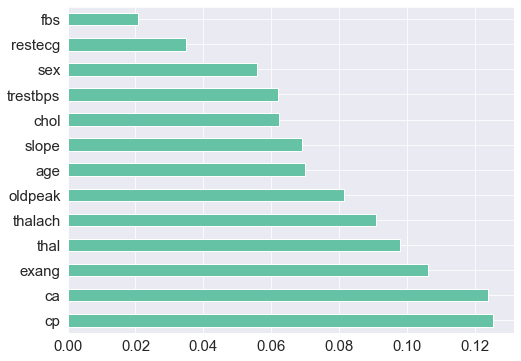

In [162]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### 3. Correlation Matrix with Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

<AxesSubplot:>

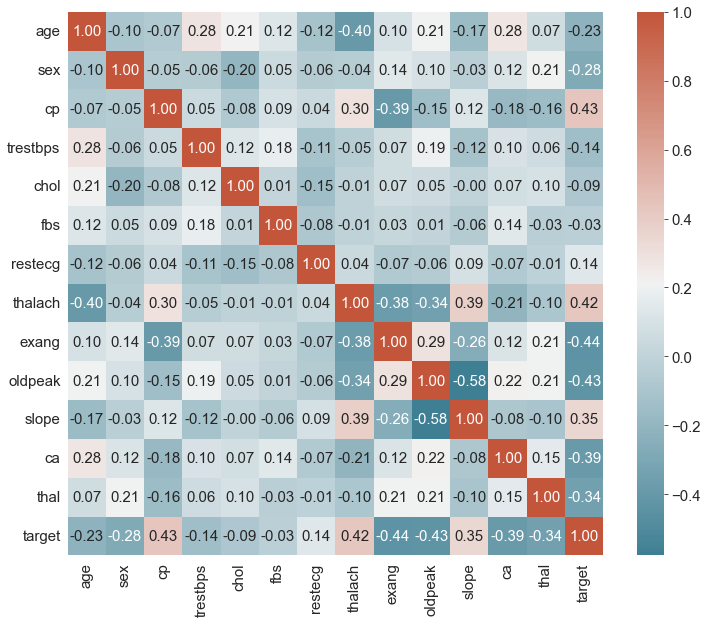

In [163]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True),fmt='.2f')

In [164]:
for col in df.columns:
    print("{0} -- {1} unique values".format(col, len(df[i].unique())))

age -- 2 unique values
sex -- 2 unique values
cp -- 2 unique values
trestbps -- 2 unique values
chol -- 2 unique values
fbs -- 2 unique values
restecg -- 2 unique values
thalach -- 2 unique values
exang -- 2 unique values
oldpeak -- 2 unique values
slope -- 2 unique values
ca -- 2 unique values
thal -- 2 unique values
target -- 2 unique values


# 4. Data Visualizaiton<a name="4"></a>

In [165]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [166]:
df2 = df.copy()

In [188]:
df2["sex"].replace({1:"Male", 0:"Female"}, inplace=True)
df2["target"].replace({0:"Positive", 1:"Negative"}, inplace=True)

Text(0.5, 1.0, 'Gender v/s target\n')

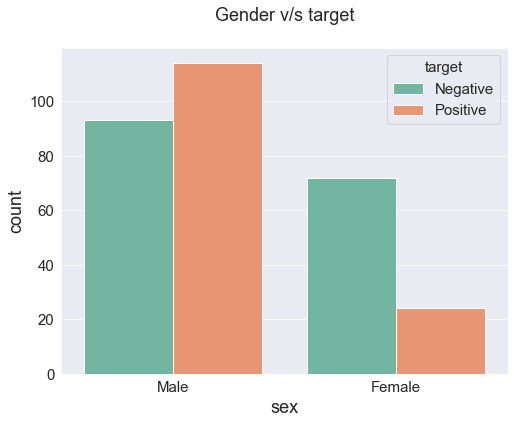

In [169]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

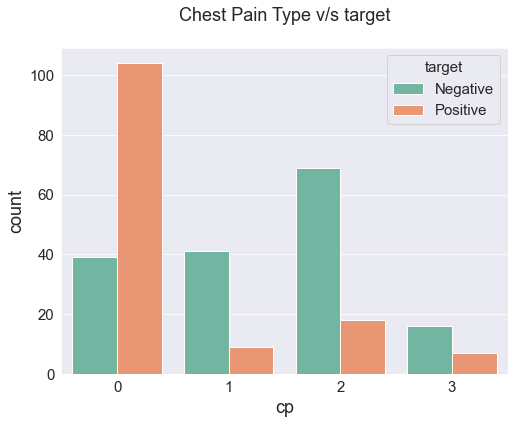

In [170]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


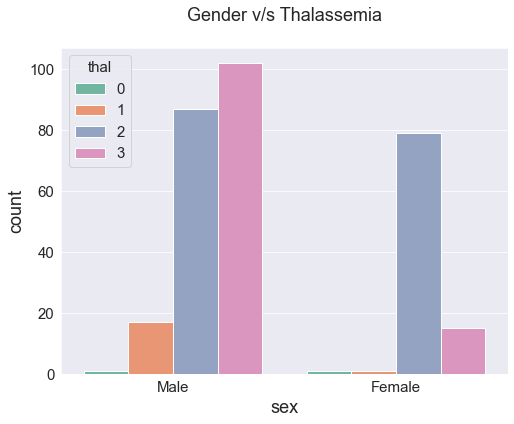

In [171]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

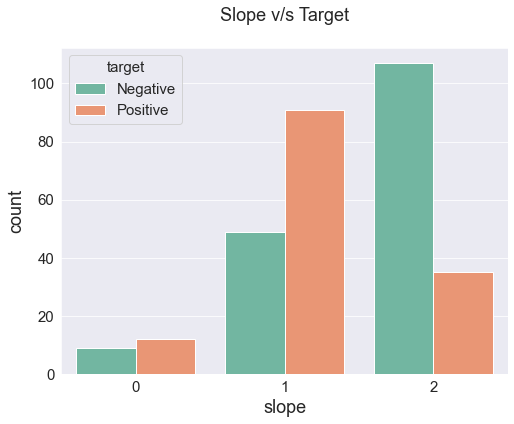

In [172]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

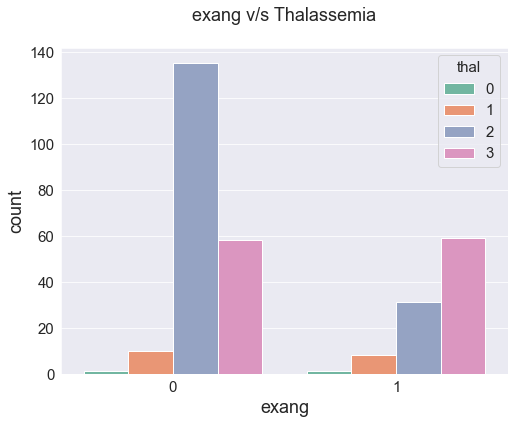

In [173]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


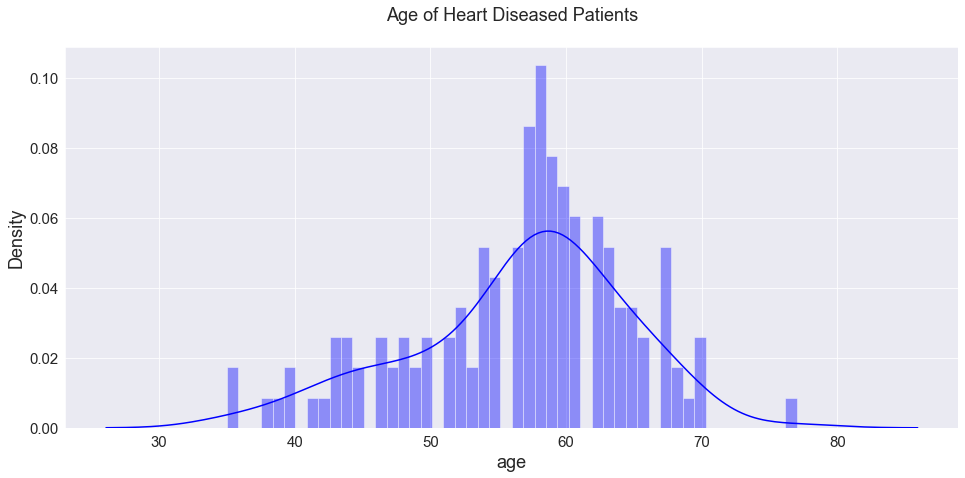

In [174]:
plt.figure(figsize=(16,7));
sns.distplot(df[df['target']==0]['age'],kde=True,bins=50, color="blue");
plt.title('Age of Heart Diseased Patients\n');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

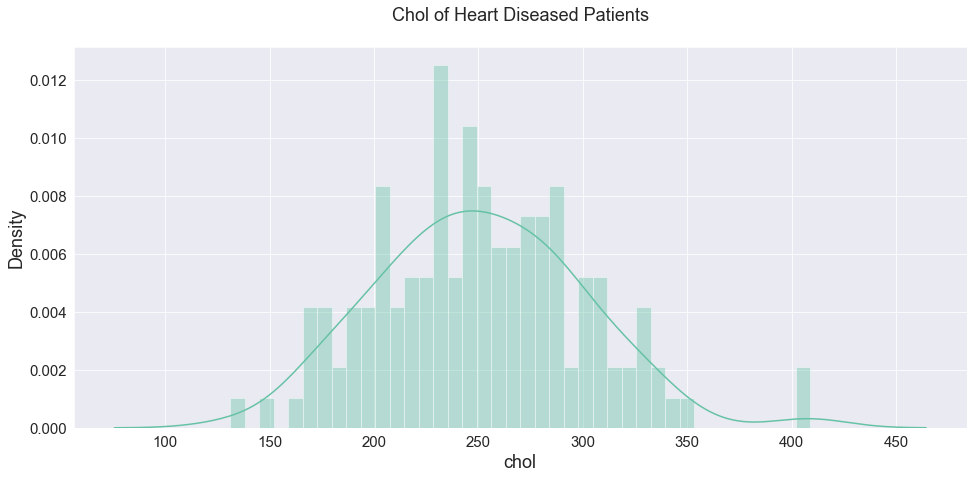

In [175]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=True,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

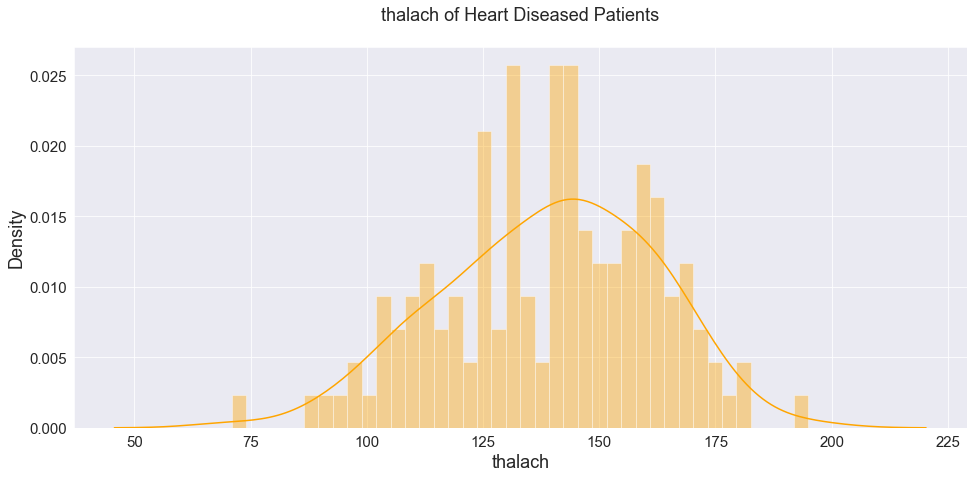

In [189]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=True,bins=40, color="orange")
plt.title('thalach of Heart Diseased Patients\n')

# 4. Machine Learning + Predictive Analytics

## Prepare Data for Modeling

In [177]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

### Normalization: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling /Training

We will now Train various Classification Models on the Training set & see which yields the highest accuracy.
We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models. 

<strong><font size=3>Model 1: Logistic Regression</font></strong>


In [180]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



<strong><font size=3>Model 2: K-NN (K-Nearest Neighbors)</font></strong>

In [181]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



<strong><font size=3>Model 3: SVM (Support Vector Machine)</font></strong>

In [182]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



<strong><font size=3>Model 4:  Naives Bayes Classifier</font></strong>

In [183]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



<strong><font size=3>Model 5: Decision Trees</font></strong>

In [184]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



<strong><font size=3>Model 6: Random Forest</font></strong>

In [185]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



<strong><font size=3>Model 7: XGBoost</font></strong>


In [186]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

ModuleNotFoundError: No module named 'xgboost'

From comparing the 7 models, we can conclude that Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%.


We have precision, recall, f1-score and support:

Precision : be "how many are correctly classified among that class"

Recall : "how many of this class you find over the whole number of element of this class" 

F1-score : harmonic mean of precision and recall values. 
           F1 score reaches its best value at 1 and worst value at 0. 
           F1 Score = 2 x ((precision x recall) / (precision + recall))
 
Support:  # of samples of the true response that lie in that class.




# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

21 is the amount of True Positives in our data, while 28 is the amount of True Negatives.

9 & 3 are the number of errors. 

There are 9 type 1 error (False Positives)- You predicted positive and it’s false.

There are 3 type 2 error (False Negatives)- You predicted negative and it’s false.

Hence if we calculate the accuracy its # Correct Predicted/ # Total.
In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

(TP + TN)/(TP + TN + FP + FN).
(21+28)/(21+28+9+3) = 0.80 = 80% accuracy

Note: A good rule of thumb is that any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

# Feature Importance

Feature Importance provides a score that indicates how helpful each feature was in our model. 

The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is. 

In [ ]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak). 